#### Problem statements
The client wants a system that will predict the employees that are likely to leave  or stay in the company

#### Their expectations
1. They want REST API to train the model using training batch dataset
2. They also want REST API ti preduct the result using predictio training batch dataset

#### Solution Design
1. The client is expected to provide their data which may possibly be in multiple files in one directory. This data is called raw data. Then we will build a schema file which describes the number of columns and the name of each columns with their data type that are available.
2. Data validation and transformation using python class to read the data. 
3. Once successfully validated, it will be stored into a database with python class
4. EDA with python class
5. Model Selection
6. Clustering and model building: Kmeans clustering is used for the clustering. The idea behind the clustering is to implement an algorith to train the data in different clusters, helping to find the best model for each cluster.
7. Using grid-search and hyper-parameter tuning to get the best model. The best model will saved for each cluster.
8. Prediction: The client will provide another data for prediction which will be validated and stored like the training data in a new database.
9. Model Call
10. Deployment

### Import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data_1 = pd.read_excel('Employees dataset.xlsx', sheet_name="Existing employees")
data_1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [3]:
data_2=pd.read_excel('Employees dataset.xlsx', sheet_name="Employees who have left")
data_2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
# Specifying target variables, let existing employees be 0 and employees who have left be 1.

data_1 ["Target_variable"] = 0  # Existing employees
data_2 ["Target_variable"] = 1  # Employees who have left

In [5]:
# We need to join these two tables
data=pd.concat([data_1,data_2])
data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,1
3567,14996,0.37,0.48,2,160,3,0,0,support,low,1
3568,14997,0.37,0.53,2,143,3,0,0,support,low,1
3569,14998,0.11,0.96,6,280,4,0,0,support,low,1


### Exploratory Data Analysis

* barplot : one or two categorical variables - sns.countplot(x,data) and sns.catplot(x, col, kind=count, data) respectively
* boxplot " one numerica and one categorical - sns.boxplot(x=cat,y=num,data=data)
* distplot: one numerical variables - sns.distplot(data["column"])
* scatter plot: Two numerical variables - 

In [6]:
data.describe(include = 'all')

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,NaN
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,NaN,NaN,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,NaN,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,NaN,NaN,0.000000


In [7]:
# To shuffle our data
from sklearn.utils import shuffle
data = shuffle(data, random_state=1)

In [8]:
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
480,481,0.37,0.49,2,151,3,0,0,sales,low,1
10508,13292,0.48,0.74,2,271,8,1,0,management,medium,0
9193,11194,0.75,0.60,4,186,10,1,0,marketing,low,0
1659,1660,0.77,0.85,5,276,5,0,0,support,medium,1
506,2507,0.17,0.76,4,171,5,0,0,product_mng,low,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 480 to 1921
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Target_variable        14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [10]:
data.shape

(14999, 11)

In [11]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Target_variable
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Target_variable', ylabel='count'>

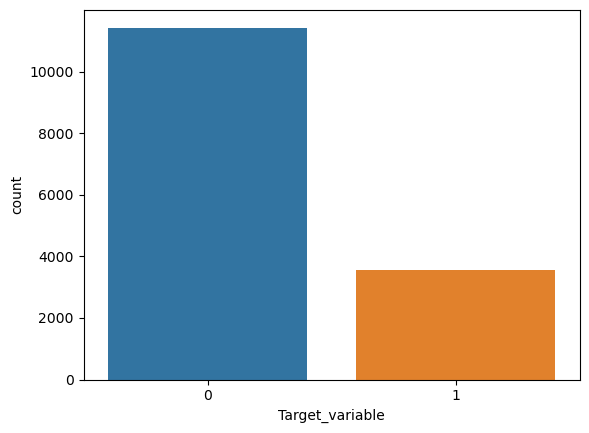

In [12]:
sns.countplot(x='Target_variable', data=data)
# Only few people left. It seems the data is imbalance

<AxesSubplot:xlabel='salary', ylabel='count'>

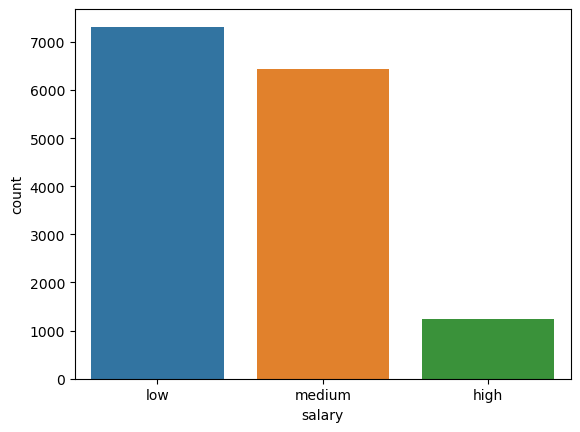

In [13]:
sns.countplot(x='salary', data=data)

# Low salaried employees have the highest number

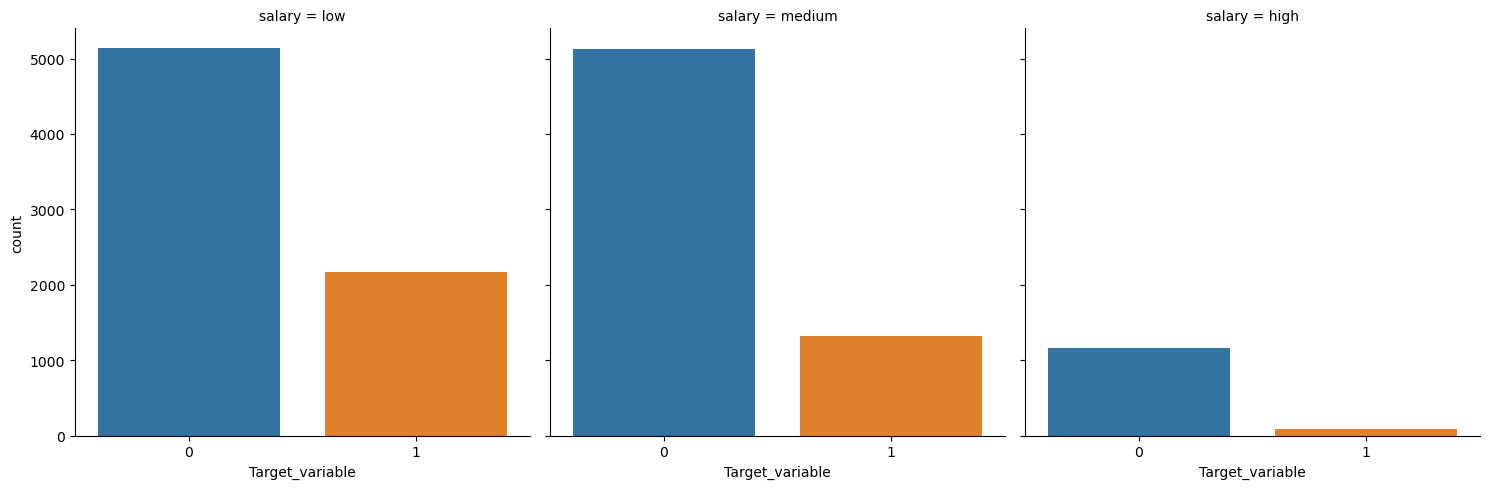

In [14]:
sns.catplot(x='Target_variable', col='salary', kind='count', data=data);
# The highest number of people that left are low salaried employees

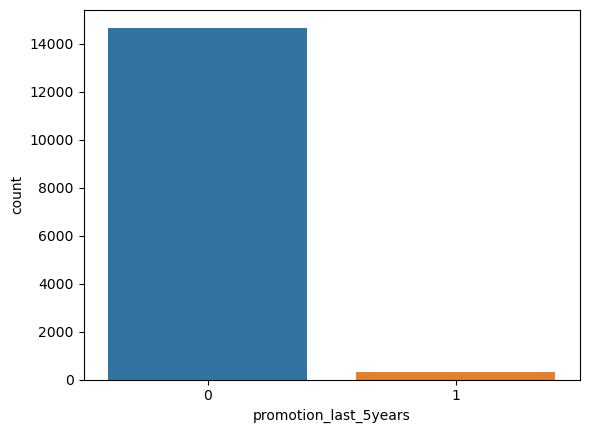

In [15]:
sns.countplot(x='promotion_last_5years', data=data);

# Very few empoyees were promopted in last 5 years

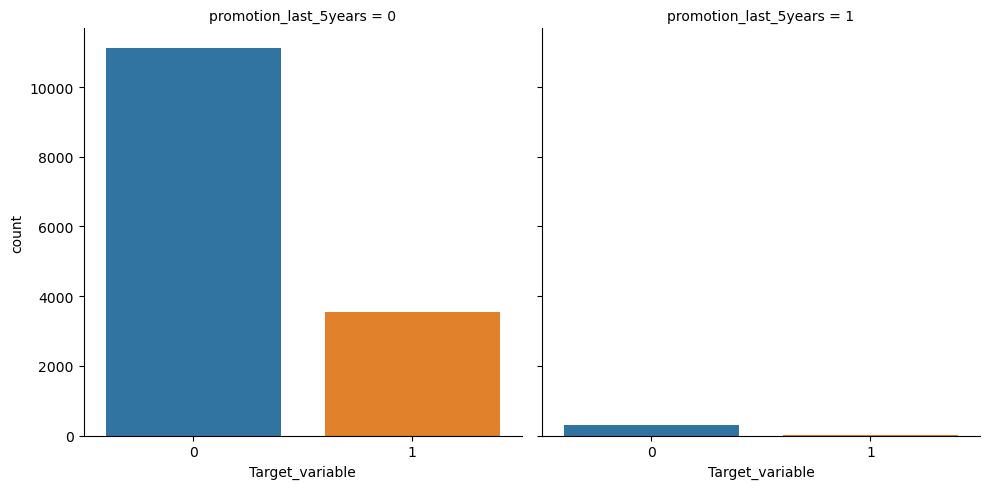

In [16]:
sns.catplot(x='Target_variable', col='promotion_last_5years', kind='count', data=data);

# Most of the employees that left were not promoted in the last 5 years

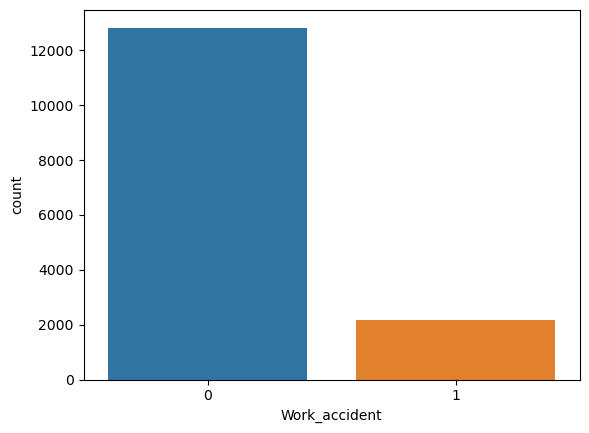

In [17]:
sns.countplot(x='Work_accident', data=data);
# Only few employees were involved in accident

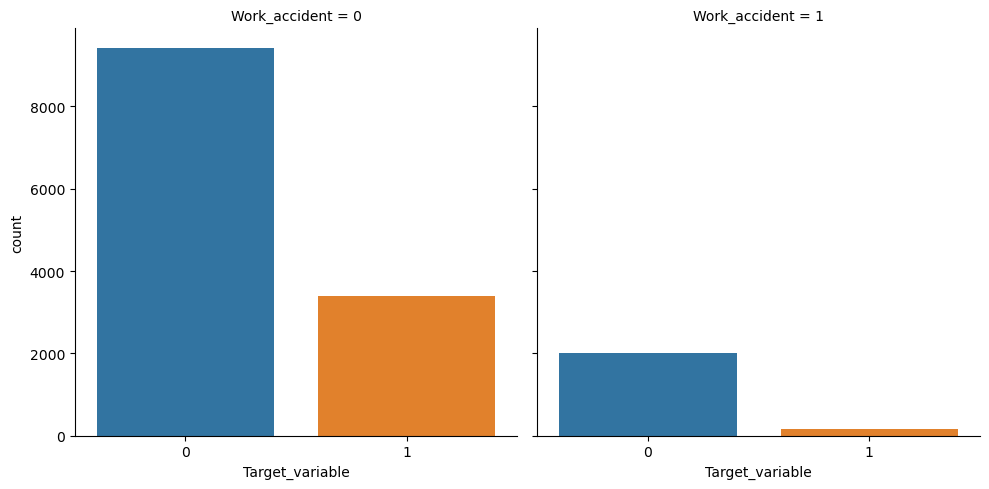

In [18]:
sns.catplot(x='Target_variable', col='Work_accident', kind='count', data=data);

# Only few people that were involved in work accident. This implies that people hardly leave because of work accident

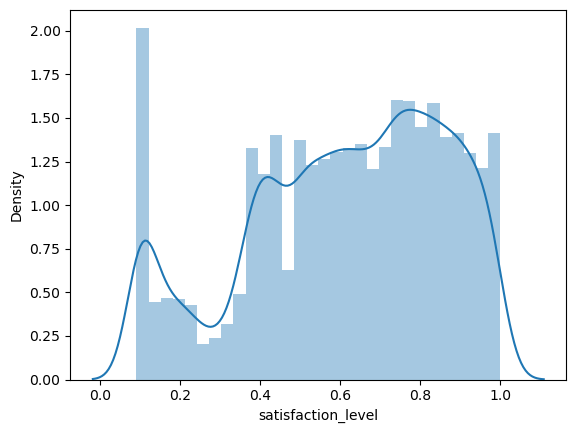

In [19]:
sns.distplot(data['satisfaction_level']);
# The s=distibution is between 0.1 and 1 with high count around 0.1

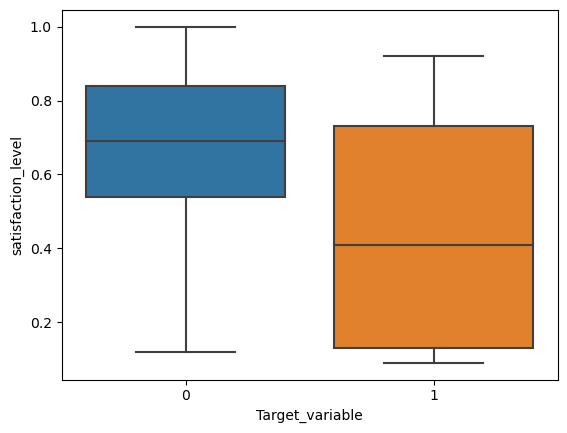

In [20]:
sns.boxplot(x='Target_variable',y="satisfaction_level",data=data);

# The satisfaction level of those that left is very low. Their median is around 0.4 with interquartile range between 0.2 and 0.5 while for the other employees, their satisfaction level is around 0.7 with interquartile range between 0.5 and 0.85.
#This implies that satisfaction level is one of the main reasons why employees are leaving.

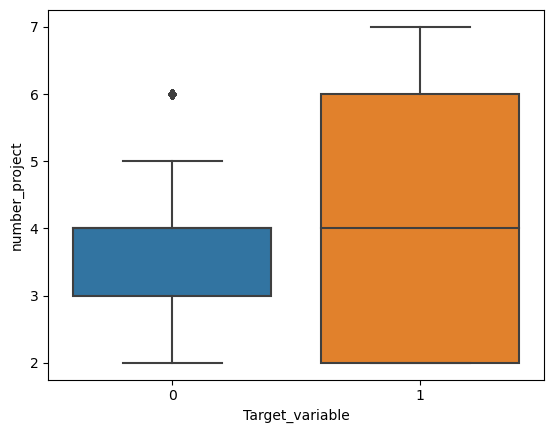

In [21]:
sns.boxplot(x='Target_variable',y='number_project',data=data);

# Employees that left mostly executed between 2 and 7 number of projects while the other ones only exectued most projects between 3 and 4 with one outlier around 6.
# This can also be a good reason the employees are leaving. Espdecially if there is no encouragemnt or motivation behind the large number of projects executed.

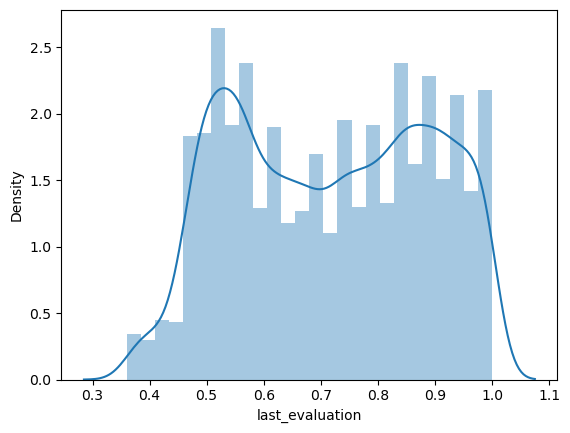

In [22]:
sns.distplot(data['last_evaluation']);

# distribution is between 0.35 and 1 with high count around 0.55

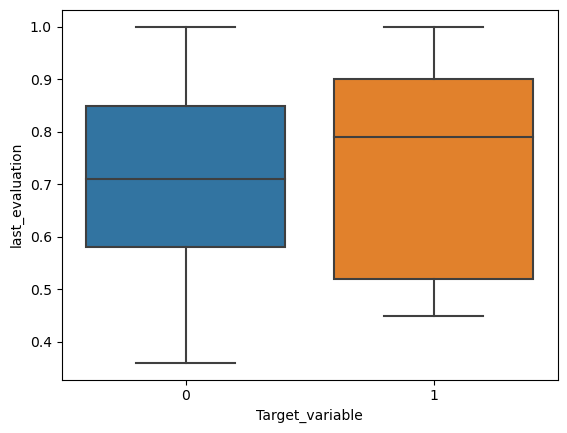

In [23]:
sns.boxplot(x='Target_variable',y='last_evaluation',data=data);

# Employees that left have high evaluation. This is not much of an impact.

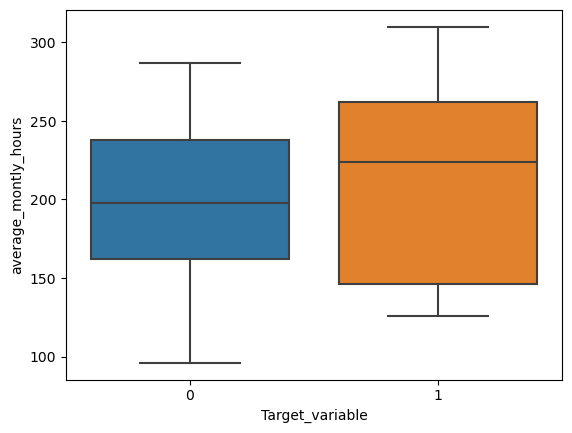

In [24]:
sns.boxplot(x='Target_variable',y='average_montly_hours',data=data);

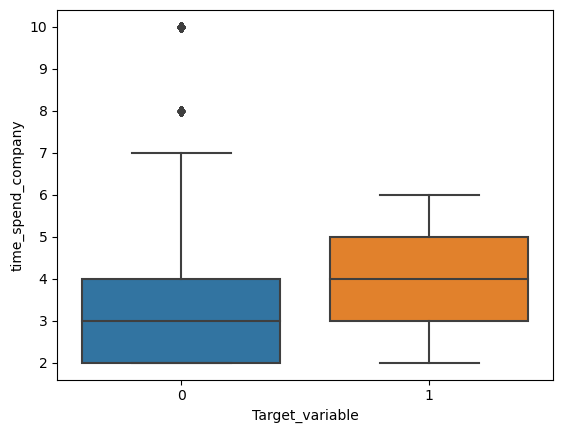

In [25]:
sns.boxplot(x='Target_variable',y='time_spend_company',data=data);

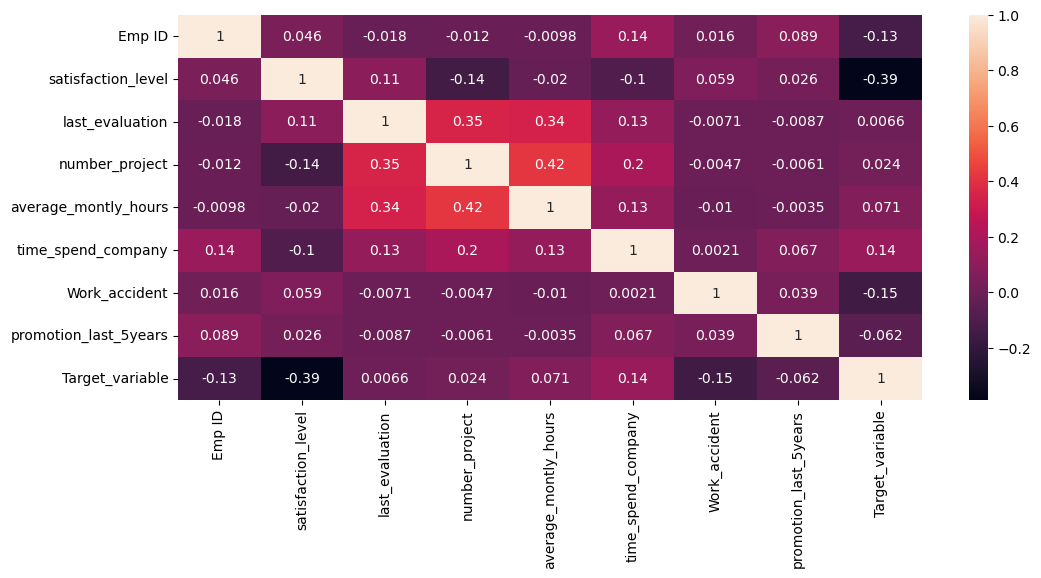

Corrletion plot above indicates that only satisfaction level correlates with the target variable and it is negatively correlated. This implies that employees who are not satisfied may be the ones leaving the organisation. However, we cannot exclusively base our assumption on it. Further assumption is  required


In [26]:
# Find the correlation of the other variables with the target variable

plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot = True)
plt.show()


print ('Corrletion plot above indicates that only satisfaction level correlates with the target variable and it is negatively correlated. This implies that employees who are not satisfied may be the ones leaving the organisation. However, we cannot exclusively base our assumption on it. Further assumption is  required')

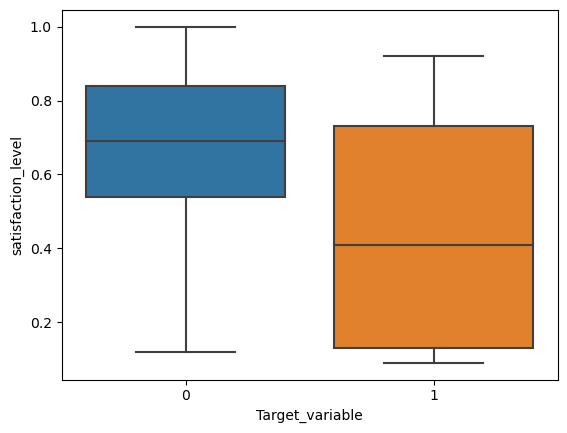

The boxplot above confirmed that for most of the employees that left, their satisfaction level so low (median at around 0.4) compared to the existing ones (median at around 0.7)


In [27]:
sns.boxplot(x='Target_variable', y="satisfaction_level", data=data)
plt.show()

print('The boxplot above confirmed that for most of the employees that left, their satisfaction level so low (median at around 0.4) compared to the existing ones (median at around 0.7)')

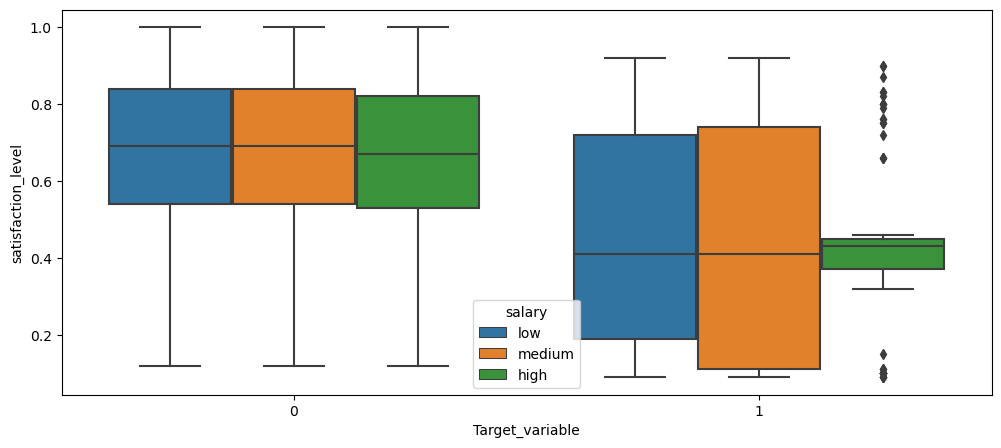

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", hue= 'salary', data=data)
plt.show()


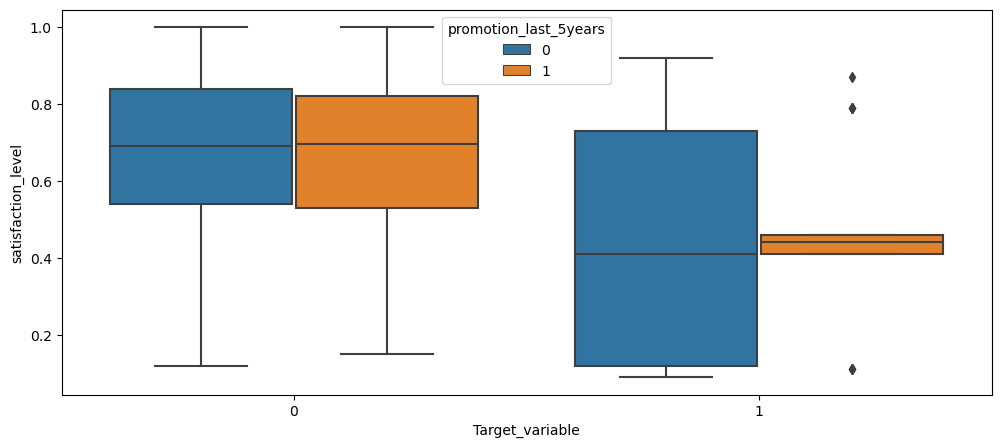

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", hue= 'promotion_last_5years', data=data)
plt.show()

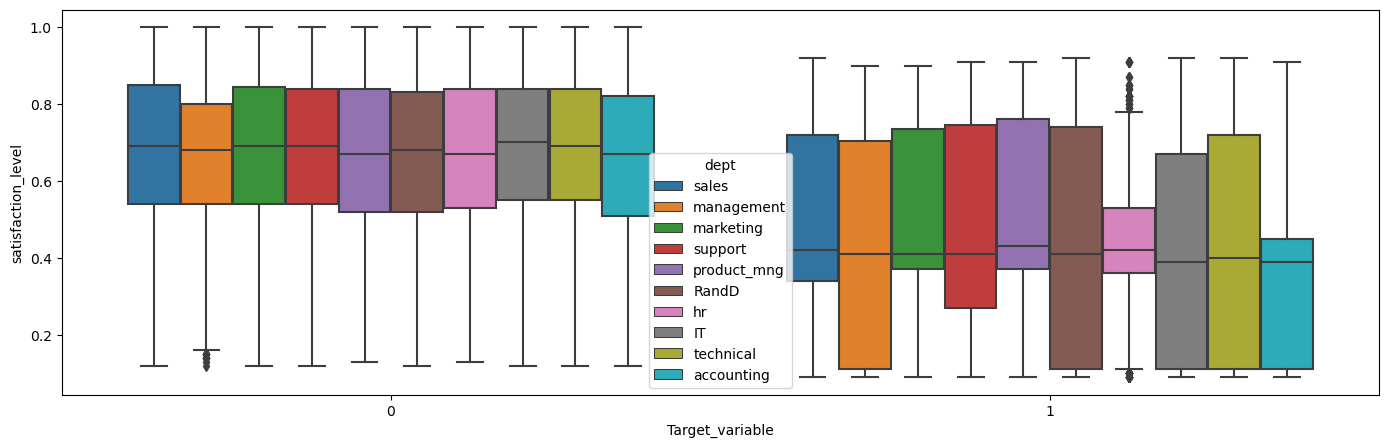

In [30]:
plt.figure(figsize=(17,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", hue= 'dept', data=data)
plt.show()

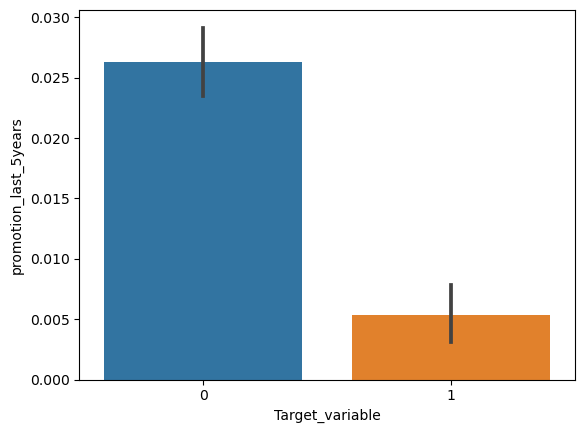

In [31]:
sns.barplot(x="Target_variable", y="promotion_last_5years", data=data)
plt.show()

#data[data['Target_variable']==1].sum()

#print('Also, most of the people that left were hardly promoted within the last five years')

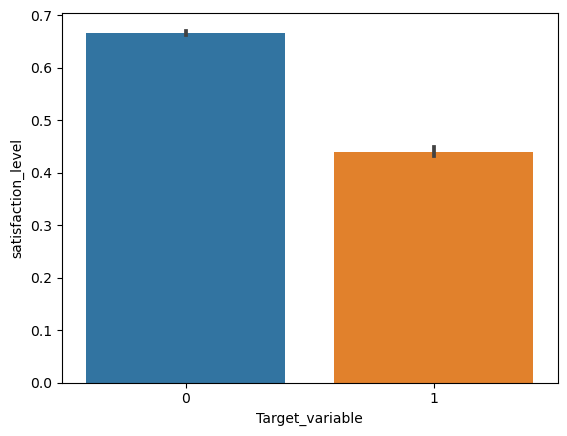

In [32]:
sns.barplot(x='Target_variable', y="satisfaction_level", data=data)
plt.show()

* The curve above is not normal and it shows that most of the employees fall unde less than 20% satisfaction level.
* These customers are likely the ones leaving the company. 
* Let's divide the data by 40% satisfaction_level to understand 


In [33]:
low_sat_level=data[data['satisfaction_level']<0.50]
low_sat_level
#data['salary']

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
480,481,0.37,0.49,2,151,3,0,0,sales,low,1
10508,13292,0.48,0.74,2,271,8,1,0,management,medium,0
506,2507,0.17,0.76,4,171,5,0,0,product_mng,low,0
8224,10225,0.13,0.76,5,171,5,0,0,RandD,medium,0
9182,11183,0.48,0.77,5,250,2,0,1,RandD,medium,0
...,...,...,...,...,...,...,...,...,...,...,...
9394,11395,0.14,0.79,5,271,4,0,0,management,high,0
3416,14845,0.38,0.56,2,154,3,0,0,sales,low,1
10955,13739,0.25,0.89,4,154,10,0,0,management,high,0
744,745,0.39,0.52,2,134,3,0,0,technical,low,1


In [34]:
high_sat_level=data[data['satisfaction_level']>=0.5]
high_sat_level

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
9193,11194,0.75,0.60,4,186,10,1,0,marketing,low,0
1659,1660,0.77,0.85,5,276,5,0,0,support,medium,1
1806,3807,0.68,0.55,3,213,3,0,0,product_mng,medium,0
8260,10261,0.91,0.58,3,172,3,0,0,hr,low,0
3253,5254,0.95,0.78,2,148,2,0,0,IT,low,0
...,...,...,...,...,...,...,...,...,...,...,...
2895,4896,0.68,0.61,3,261,5,0,0,sales,medium,0
7813,9814,0.64,0.94,3,204,2,0,0,technical,high,0
905,2906,0.69,0.90,2,155,2,0,0,technical,low,0
5192,7193,0.66,0.72,5,152,3,1,0,sales,low,0


<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

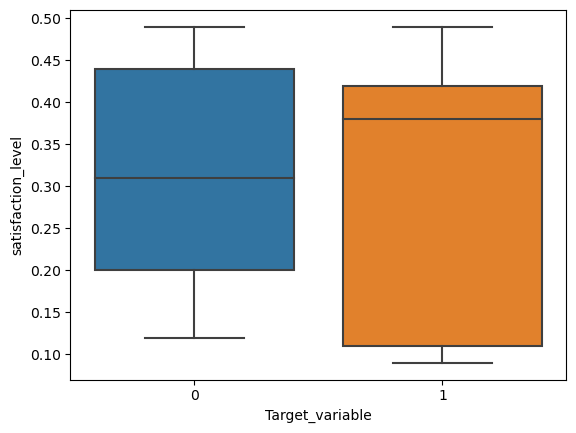

In [35]:
sns.boxplot(x='Target_variable', y="satisfaction_level", data=low_sat_level)

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

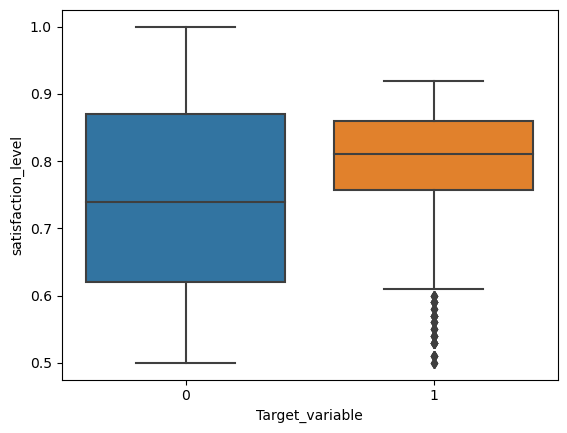

In [36]:
sns.boxplot(x='Target_variable', y="satisfaction_level", data=high_sat_level)

* Those that have are left the company are represented by 1 while those that are stil left are represented by 0
* The satisfaction threshold was done at 50% satisfaction level
* Those with low satisfaction 

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

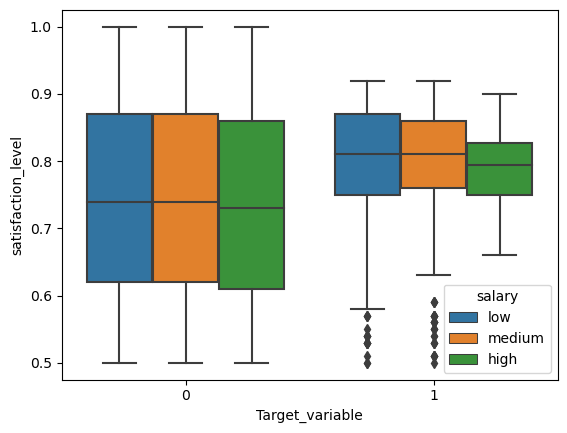

In [37]:
sns.boxplot(x='Target_variable', y="satisfaction_level", data=high_sat_level, hue='salary')

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

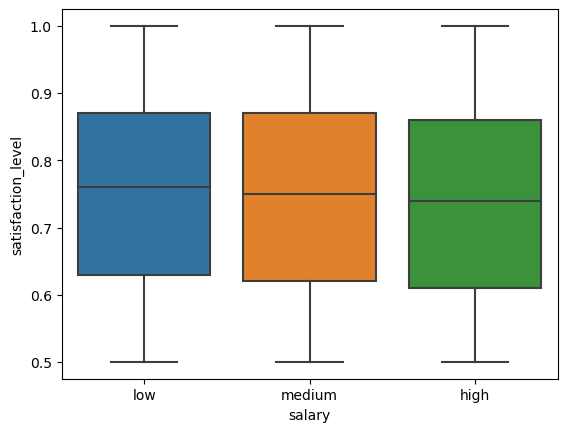

In [38]:
sns.boxplot(x='salary', y="satisfaction_level", data=high_sat_level)

<AxesSubplot:xlabel='dept', ylabel='satisfaction_level'>

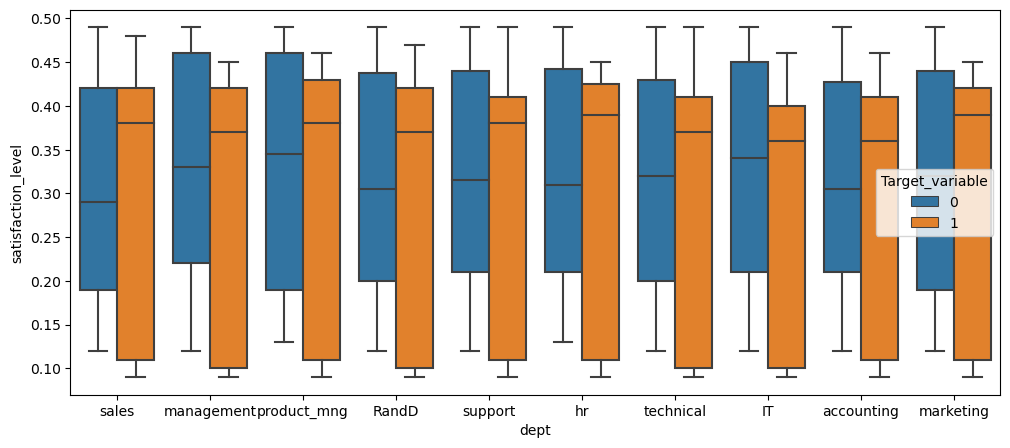

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(x='dept', y="satisfaction_level", data=low_sat_level, hue='Target_variable')

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

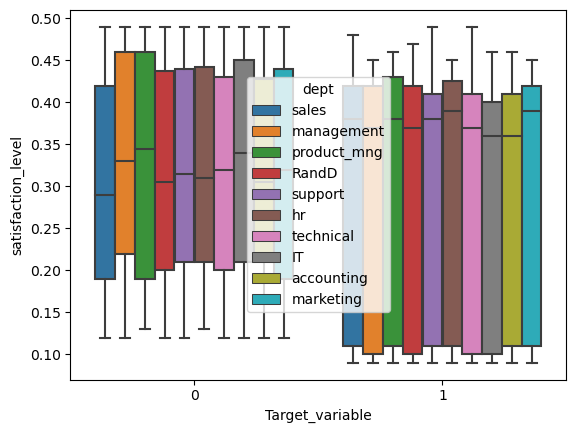

In [40]:
sns.boxplot(x='Target_variable', y="satisfaction_level", data=low_sat_level, hue='dept')

<AxesSubplot:xlabel='dept', ylabel='satisfaction_level'>

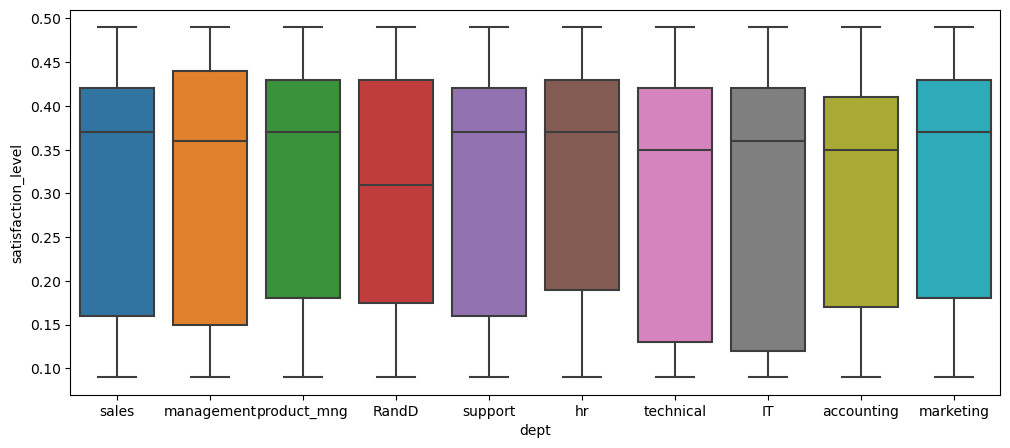

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(x='dept', y="satisfaction_level", data=low_sat_level)

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

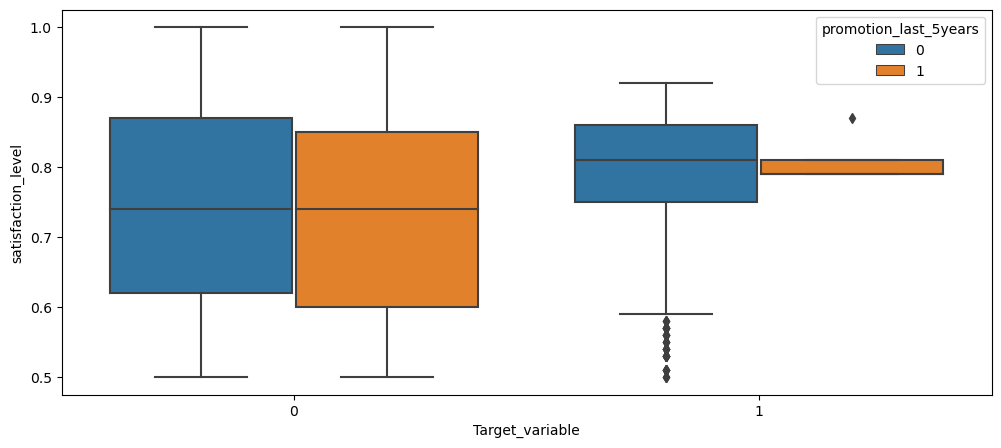

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", data=high_sat_level, hue='promotion_last_5years')

In [43]:
# The boxplot project shows that only a few of those with high satisfaction level that still left the company were promoted within the last five years. This could be another reason they left.

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

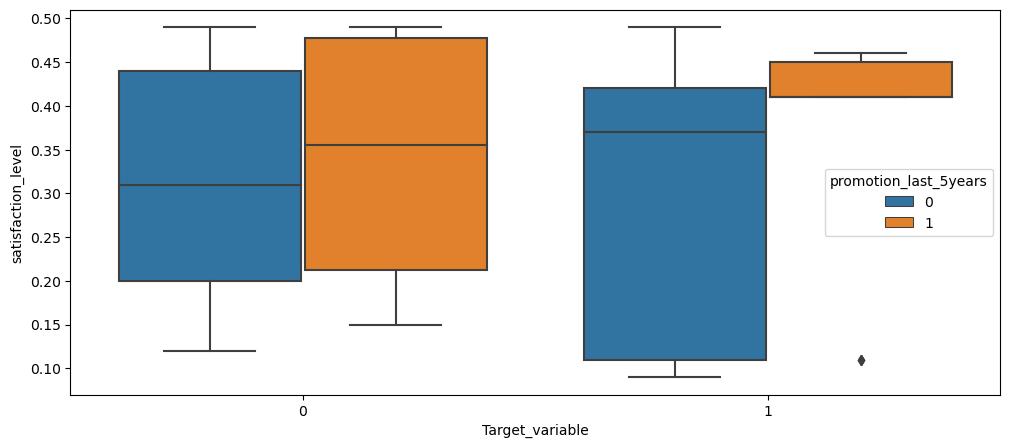

In [44]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", data=low_sat_level, hue='promotion_last_5years')

<AxesSubplot:xlabel='Target_variable', ylabel='satisfaction_level'>

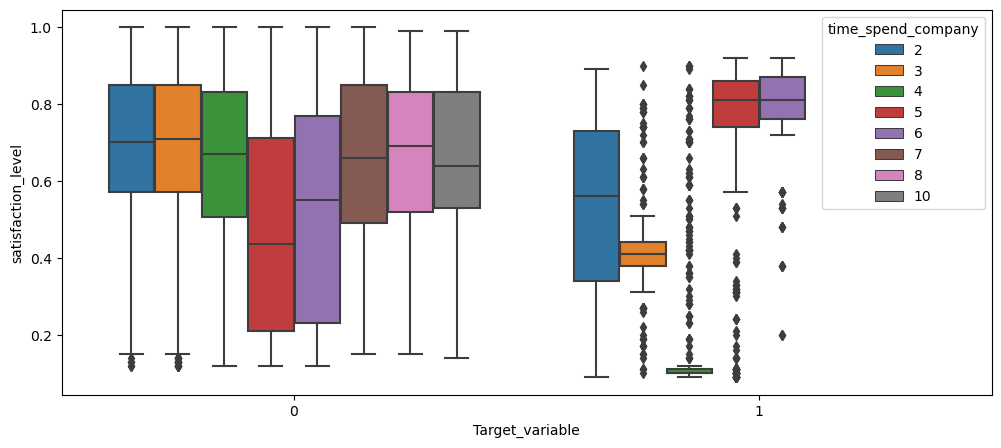

In [45]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Target_variable', y="satisfaction_level", data=data, hue= 'time_spend_company')

In [46]:
df=low_sat_level

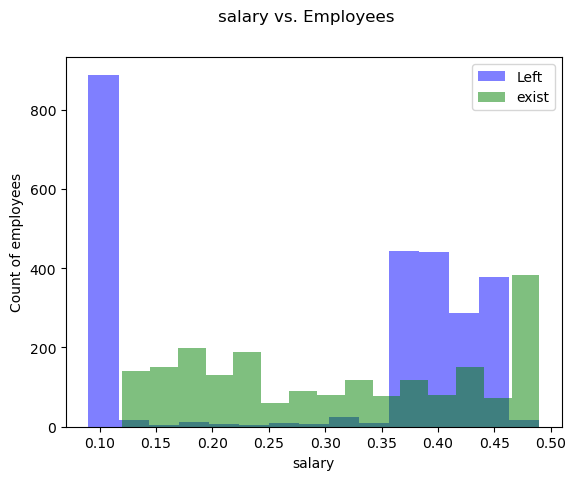

In [47]:
fig, ax = plt.subplots()

ax.hist(df[df["Target_variable"]==1]["satisfaction_level"], bins=15, alpha=0.5, color="blue", label="Left")
ax.hist(df[df["Target_variable"]==0]["satisfaction_level"], bins=15, alpha=0.5, color="green", label="exist")

ax.set_xlabel("salary")
ax.set_ylabel("Count of employees")

fig.suptitle("salary vs. Employees")

ax.legend();

### Feature Engineering

In [48]:
df = data.copy()

In [49]:
df.drop('Emp ID', axis=1, inplace=True)
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Target_variable
480,0.37,0.49,2,151,3,0,0,sales,low,1


In [50]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Target_variable          0
dtype: int64

In [51]:
df.select_dtypes(include=['object']).columns #selecting data for categorical varioables

Index(['dept', 'salary'], dtype='object')

In [52]:
df.select_dtypes(exclude=['object']).columns #selecting data for numerical varioables

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Target_variable'],
      dtype='object')

In [53]:
categorical_columns = ['dept', 'salary']

In [54]:
df_enc = pd.get_dummies(df, columns=categorical_columns, drop_first=True) #Encoding categorical variables
df_enc.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Target_variable,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
480,0.37,0.49,2,151,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [55]:
# Split the dataset into training and test sets
train_data, test_data = train_test_split(df_enc, test_size=0.3, random_state=42)

# Save the training and test sets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [57]:
train_data.shape

(10499, 19)

In [58]:
test_data.shape

(4500, 19)

In [59]:
df.shape

(14999, 10)